In [35]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [9]:
df.shape

(45000, 14)

In [4]:
df.isnull().sum().any()

False

In [6]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [7]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [8]:
x = df.drop(columns=['loan_status'])
y = df['loan_status']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
x_train.shape

(31500, 13)

In [12]:
x_test.shape

(13500, 13)

## Implementing KNN

### Training

In [32]:
k_range = [1, 3, 5, 10, 15, 20, 25, 50, 100, 250, 500]
train_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_train)
    accuracy = accuracy_score(y_train, y_pred)
    train_scores.append(accuracy)
    print(f"\nAccuracy of KNN classifier with K={k}: {accuracy * 100:.2f}%")


Accuracy of KNN classifier with K=1: 100.00%

Accuracy of KNN classifier with K=3: 90.01%

Accuracy of KNN classifier with K=5: 87.89%

Accuracy of KNN classifier with K=10: 86.02%

Accuracy of KNN classifier with K=15: 85.67%

Accuracy of KNN classifier with K=20: 85.28%

Accuracy of KNN classifier with K=25: 85.15%

Accuracy of KNN classifier with K=50: 84.40%

Accuracy of KNN classifier with K=100: 83.92%

Accuracy of KNN classifier with K=250: 83.35%

Accuracy of KNN classifier with K=500: 82.92%


### Validating

In [33]:
k_range = [1, 3, 5, 10, 15, 20, 25, 50, 100, 250, 500]
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_scores.append(accuracy)
    print(f"\nAccuracy of KNN classifier with K={k}: {accuracy * 100:.2f}%")


Accuracy of KNN classifier with K=1: 79.89%

Accuracy of KNN classifier with K=3: 82.40%

Accuracy of KNN classifier with K=5: 83.06%

Accuracy of KNN classifier with K=10: 83.62%

Accuracy of KNN classifier with K=15: 83.35%

Accuracy of KNN classifier with K=20: 83.77%

Accuracy of KNN classifier with K=25: 83.68%

Accuracy of KNN classifier with K=50: 83.44%

Accuracy of KNN classifier with K=100: 83.15%

Accuracy of KNN classifier with K=250: 82.86%

Accuracy of KNN classifier with K=500: 82.33%


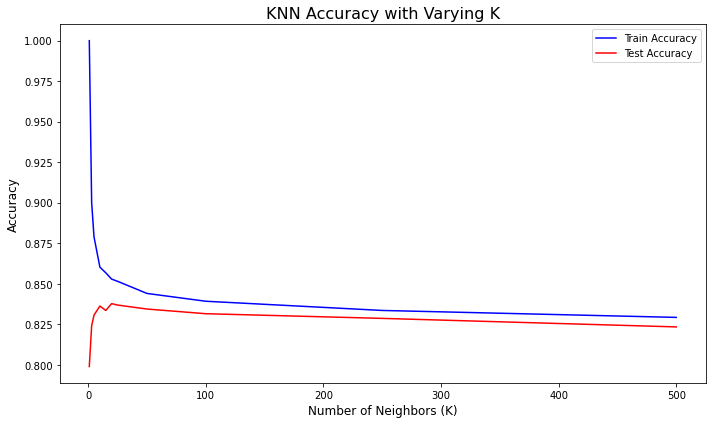

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, label="Train Accuracy", color='blue')
plt.plot(k_range, test_scores, label="Test Accuracy", color='red')

plt.title("KNN Accuracy with Varying K", fontsize=16)
plt.xlabel("Number of Neighbors (K)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()